In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
def remove_extreme_values(df):
    for c in df.columns:
        if c.find('_estimate') != -1:
            df = df[df[c] > df[c].min()+0.0001]
            df = df[df[c] < df[c].max()-0.0001]
    return df

In [3]:
# recovery_2d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Hybrid/Hybrid_2d_recovery.csv', index_col=0))
recovery_2d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE/IE_2d_recovery.csv', index_col=0))

recovery_3d = pd.read_csv('../_Parameter_recovery/_Hybrid/Hybrid_3d_recovery.csv', index_col=0)
recovery_4d = pd.read_csv('../_Parameter_recovery/_Hybrid/Hybrid_4d_recovery.csv', index_col=0)

mu_2d_true = np.append([recovery_2d['mu1_true'], 
                        recovery_2d['mu2_true']], 0)
mu_2d_estimate = np.append([recovery_2d['mu1_estimate'], 
                            recovery_2d['mu2_estimate']], 0)

mu_3d_true = np.append([recovery_3d['mu1_true'],
                        recovery_3d['mu2_true'],
                        recovery_3d['mu3_true']], 0)
mu_3d_estimate = np.append([recovery_3d['mu1_estimate'],
                            recovery_3d['mu2_estimate'],
                            recovery_3d['mu3_estimate']], 0)

mu_4d_true = np.append([recovery_4d['mu1_true'],
                        recovery_4d['mu2_true'],
                        recovery_4d['mu3_true'],
                        recovery_4d['mu4_true']], 0)
mu_4d_estimate = np.append([recovery_4d['mu1_estimate'],
                            recovery_4d['mu2_estimate'],
                            recovery_4d['mu3_estimate'],
                            recovery_4d['mu4_estimate']], 0)

In [4]:
print(rmse(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(rmse(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(rmse(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(rmse(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(rmse(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(rmse(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(rmse(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(rmse(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(rmse(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.5950923028808912
0.17020011768790186
0.642093604947836
0.093542744148634
0.015774759269112718
0.13773940472138993
0.43473122038570083
0.0823166373912199
0.6068347101463859


In [5]:
print(r2_score(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(r2_score(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(r2_score(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(r2_score(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(r2_score(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(r2_score(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(r2_score(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(r2_score(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(r2_score(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.7535832666431024
0.6287955141688187
0.8873115193223244
0.9957028528347682
0.9909979898924065
0.9950109075513206
0.7953388792682162
-0.29605389904258894
0.8834011257374508


In [6]:
print(pearsonr(recovery_2d['threshold_true'], recovery_2d['threshold_estimate'])[0])
print(pearsonr(recovery_2d['ndt_true'], recovery_2d['ndt_estimate'])[0])
print(pearsonr(mu_2d_true, mu_2d_estimate)[0])

print('============')

print(pearsonr(recovery_3d['threshold_true'], recovery_3d['threshold_estimate'])[0])
print(pearsonr(recovery_3d['ndt_true'], recovery_3d['ndt_estimate'])[0])
print(pearsonr(mu_3d_true, mu_3d_estimate)[0])

print('============')

print(pearsonr(recovery_4d['threshold_true'], recovery_4d['threshold_estimate'])[0])
print(pearsonr(recovery_4d['ndt_true'], recovery_4d['ndt_estimate'])[0])
print(pearsonr(mu_4d_true, mu_4d_estimate)[0])

0.87766401507539
0.8447675900846177
0.9460924629944689
0.9980251945910745
0.9957906983558237
0.9977361369818186
0.9317803425523443
0.9447340237133751
0.9607682724024952


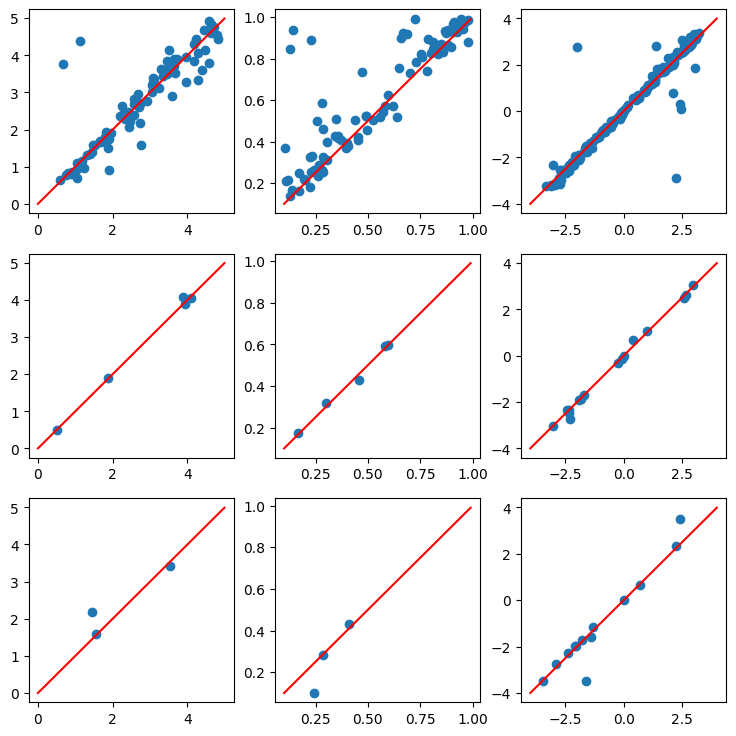

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

axs[0, 0].plot(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01), c='red')
axs[0, 0].scatter(x=recovery_2d['threshold_true'], y=recovery_2d['threshold_estimate']);

axs[0, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[0, 1].scatter(x=recovery_2d['ndt_true'], y=recovery_2d['ndt_estimate']);

axs[0, 2].plot(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01), c='red')
axs[0, 2].scatter(x=mu_2d_true, y=mu_2d_estimate);

############

axs[1, 0].plot(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01), c='red')
axs[1, 0].scatter(x=recovery_3d['threshold_true'], y=recovery_3d['threshold_estimate']);

axs[1, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[1, 1].scatter(x=recovery_3d['ndt_true'], y=recovery_3d['ndt_estimate']);

axs[1, 2].plot(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01), c='red')
axs[1, 2].scatter(x=mu_3d_true, y=mu_3d_estimate);

############

axs[2, 0].plot(np.arange(0, 5, 0.01), np.arange(0, 5, 0.01), c='red')
axs[2, 0].scatter(x=recovery_4d['threshold_true'], y=recovery_4d['threshold_estimate']);

axs[2, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[2, 1].scatter(x=recovery_4d['ndt_true'], y=recovery_4d['ndt_estimate']);

axs[2, 2].plot(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01), c='red')
axs[2, 2].scatter(x=mu_4d_true, y=mu_4d_estimate);